### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

- Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной). 

- Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.  

- Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.  

- Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.  

- Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных. 

- Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV. 

- Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии. 

- Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения. 


# Вариант 13 

Horse Colic Data Set 

Название файла: horse-colic.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Horse+Colic 

Класс: outcome (столбец No 23) 

Зависимая переменная: total protein (столбец No 20) 

Метод обработки пропущенных значений – медиана класса 

Метод обработки выбросов – алгоритм кластеризации OPTICS 

Метод снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier) 

Регрессоры: 

⁃               Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃               гребневая регрессия (Ridge), параметр alpha в диапазоне от 0.1 до 1 

⁃               регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5 

Показатели качества регрессии: 

⁃               Для определения лучшего регрессора MAPE 

⁃               Для визуализации кривой обучения MaxErr 

 

# 1. открыть базу данных и прочитать значения

In [1]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
horse_colic = fetch_ucirepo(id=47) 

In [2]:
horse_colic['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [3]:
horse_colic['data']['features']

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,lesion_site,lesion_type,lesion_subtype,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,5.0,45.0,8.4,NaN,NaN,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,2.0,50.0,85.0,2.0,2.0,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,NaN,NaN,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,NaN,48.0,7.2,3.0,5.3,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,74.0,7.4,NaN,NaN,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,1,529695,38.6,60.0,30.0,1.0,1.0,3.0,1.0,...,NaN,40.0,6.0,1.0,NaN,1.0,3205,0,0,2
364,2.0,1,528452,37.8,42.0,40.0,1.0,1.0,1.0,1.0,...,3.0,36.0,6.2,NaN,NaN,1.0,4124,0,0,2
365,1.0,1,534783,38.0,60.0,12.0,1.0,1.0,2.0,1.0,...,4.0,44.0,65.0,3.0,2.0,3.0,2209,0,0,2
366,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,1.0,37.0,5.8,NaN,NaN,1.0,3111,0,0,2


In [4]:
horse_colic['data']['features']['outcome'].unique()

array([ 2.,  3.,  1., nan])

In [5]:
horse_colic['data']['features']['total_protein'].unique()

array([ 8.4, 85. ,  6.7,  7.2,  7.4,  nan,  7. ,  8.3,  6.2,  6. ,  7.8,
        6.1, 81. ,  6.8,  8.7, 70. , 65. ,  5.5, 76. ,  7.5,  8.2,  6.6,
        8.6, 80. ,  6.5,  8.5, 67. , 69. ,  9.1,  7.7,  6.4,  8.1,  5.9,
        8. , 82. , 72. , 74. ,  6.3,  7.6,  4.9, 57. , 68. , 77. ,  8.9,
        5.7,  4.5, 61. , 86. , 60. , 66. ,  5.3,  7.3, 64. , 58. , 56. ,
       75. , 10.2, 62. ,  7.9, 73. , 71. , 63. , 46. ,  5.8, 53. ,  4.7,
       59. , 55. , 89. , 51. ,  4. , 11. ,  8.8, 50. , 54. ,  6.9,  4.6,
       13. ,  7.1,  3.3,  9. ,  5. ,  3.5, 36. , 79. ])

In [6]:
data = horse_colic['data']['features']

# 2. предобработка данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   surgery                         366 non-null    float64
 1   age                             368 non-null    int64  
 2   hospital_number                 368 non-null    int64  
 3   rectal_temperature              299 non-null    float64
 4   pulse                           342 non-null    float64
 5   respiratory_rate                297 non-null    float64
 6   temperature_of_extremities      303 non-null    float64
 7   peripheral_pulse                285 non-null    float64
 8   mucous_membranes                320 non-null    float64
 9   capillary_refill_time           330 non-null    float64
 10  pain                            305 non-null    float64
 11  peristalsis                     316 non-null    float64
 12  abdominal_distension            303 

In [8]:
data = data[data['outcome'].notna()]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 367
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   surgery                         366 non-null    float64
 1   age                             366 non-null    int64  
 2   hospital_number                 366 non-null    int64  
 3   rectal_temperature              297 non-null    float64
 4   pulse                           340 non-null    float64
 5   respiratory_rate                295 non-null    float64
 6   temperature_of_extremities      302 non-null    float64
 7   peripheral_pulse                283 non-null    float64
 8   mucous_membranes                318 non-null    float64
 9   capillary_refill_time           328 non-null    float64
 10  pain                            303 non-null    float64
 11  peristalsis                     315 non-null    float64
 12  abdominal_distension            302 non-n

# 3. замена пропущенных значений

In [10]:
for col in data.columns:
    data.loc[:, col] = data[col].fillna(data[col].median())

data

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,lesion_site,lesion_type,lesion_subtype,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,3.0,2.0,...,5.0,45.0,8.4,2.0,2.1,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,3.0,1.0,4.0,1.0,...,2.0,50.0,85.0,2.0,2.0,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,2.0,2.1,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,4.0,48.0,7.2,3.0,5.3,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,3.0,1.0,6.0,2.0,...,4.0,74.0,7.4,2.0,2.1,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,1,529695,38.6,60.0,30.0,1.0,1.0,3.0,1.0,...,4.0,40.0,6.0,1.0,2.1,1.0,3205,0,0,2
364,2.0,1,528452,37.8,42.0,40.0,1.0,1.0,1.0,1.0,...,3.0,36.0,6.2,2.0,2.1,1.0,4124,0,0,2
365,1.0,1,534783,38.0,60.0,12.0,1.0,1.0,2.0,1.0,...,4.0,44.0,65.0,3.0,2.0,3.0,2209,0,0,2
366,2.0,1,528926,38.0,42.0,12.0,3.0,1.0,3.0,1.0,...,1.0,37.0,5.8,2.0,2.1,1.0,3111,0,0,2


# 4. масштабирование и снижение размерности

In [11]:
RESPONSES = ['outcome', 'total_protein']

In [12]:
for col in data.columns:
    if data[col].nunique() < 50:
        if col not in RESPONSES:
            data = data.drop(col, axis=1)

In [ ]:
for col in data.columns:
    if col not in RESPONSES:
        coldata = data[col]
        data.loc[:, col] = (coldata - coldata.min()) / (coldata.max() - coldata.min())

data

/tmp/ipykernel_1825/1264626501.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.30220084e-03 4.28647458e-03 3.35083014e-03 9.96823442e-01
 3.33434210e-03 2.93779415e-03 2.61366838e-03 3.19909838e-03
 3.29176537e-03 9.98747743e-01 2.97807507e-03 2.84846651e-03
 2.87017229e-03 9.97015455e-01 4.30734553e-03 3.32975049e-03
 9.99079591e-01 2.57964874e-03 9.96838469e-01 3.72149812e-03
 3.31388857e-03 3.14337295e-03 1.54486731e-03 4.32425099e-03
 4.05167646e-03 3.18052323e-03 3.39090236e-03 2.99998956e-03
 9.94534526e-01 4.41128283e-03 3.17154873e-03 3.33162887e-03
 3.16153068e-03 3.21078610e-03 3.23854446e-03 3.03317437e-03
 3.17530550e-03 4.08402642e-03 3.07157690e-03 9.94110219e-01
 3.17634905e-03 9.96372630e-01 3.34394273e-03 4.13035992e-03
 4.40961316e-03 3.24501445e-03 3.25774573e-03 3.24376220e-03
 3.04945370e-03 3.20640321e-03 3.23228318e-03 2.80234172e-03
 3.17321840e-03 3.39465913e-03 3.16862680e-03 9.9524

,hospital_number,pulse,packed_cell_volume,total_protein,outcome,lesion_site
0,0.003302,0.233766,0.577465,8.4,2.0,0.274872
1,0.004286,0.376623,0.647887,85.0,3.0,0.053710
2,0.003351,0.064935,0.408451,6.7,1.0,0.000000
3,0.996823,0.870130,0.619718,7.2,2.0,0.053710
4,0.003334,0.480519,0.985915,7.4,2.0,0.104597
...,...,...,...,...,...,...
363,0.003217,0.194805,0.507042,6.0,1.0,0.077962
364,0.002958,0.077922,0.450704,6.2,1.0,0.100316
365,0.004279,0.194805,0.563380,65.0,3.0,0.053734
366,0.003057,0.077922,0.464789,5.8,1.0,0.075675


In [14]:
# find the most important features using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

FEATURES = list(set(data.columns) - set(RESPONSES))

X = data[FEATURES]
y = data['outcome']

model = ExtraTreesClassifier(n_estimators=5000)
model.fit(X, y)
print(model.feature_importances_)

[0.24323298 0.22945494 0.26896993 0.25834215]


In [15]:
import numpy as np

argmin = np.argmin(model.feature_importances_)

data = data.drop(FEATURES[argmin], axis=1)

FEATURES = list(set(data.columns) - set(RESPONSES))
data

,hospital_number,pulse,total_protein,outcome,lesion_site
0,0.003302,0.233766,8.4,2.0,0.274872
1,0.004286,0.376623,85.0,3.0,0.053710
2,0.003351,0.064935,6.7,1.0,0.000000
3,0.996823,0.870130,7.2,2.0,0.053710
4,0.003334,0.480519,7.4,2.0,0.104597
...,...,...,...,...,...
363,0.003217,0.194805,6.0,1.0,0.077962
364,0.002958,0.077922,6.2,1.0,0.100316
365,0.004279,0.194805,65.0,3.0,0.053734
366,0.003057,0.077922,5.8,1.0,0.075675


# 5. визуализация

1.0 225
2.0 89
3.0 52


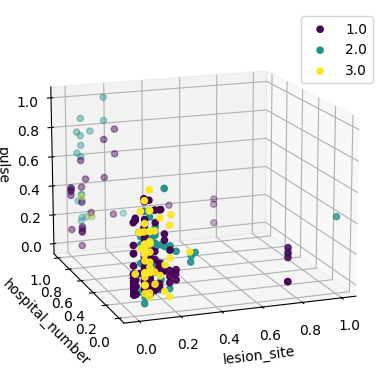

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

CLASSES = list(set(data['outcome']))

for i in CLASSES:
    df_k = data[data['outcome'] == i]
    print(i, len(df_k))
    ax.scatter(df_k[FEATURES[0]], df_k[FEATURES[1]], df_k[FEATURES[2]], c=[i for _ in range(len(df_k))], marker='o', label=i, cmap='viridis', vmin=1, vmax=3)


ax.set_xlabel(FEATURES[0])
ax.set_ylabel(FEATURES[1])
ax.set_zlabel(FEATURES[2])

ax.legend()

ax.view_init(15, -110)

plt.show()

# 6. регрессия

In [ ]:
# test-train split
from sklearn.model_selection import train_test_split

X = data[FEATURES]
y = data['total_protein']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31337)
X_train

,lesion_site,hospital_number,pulse
298,0.053710,0.003409,0.454545
166,0.000000,0.002846,0.064935
117,0.102287,0.996839,0.194805
216,0.000000,0.003068,0.194805
92,0.000000,0.003334,0.129870
...,...,...,...
190,0.076210,0.003019,0.064935
254,0.075675,0.004061,0.324675
22,0.075675,0.001545,0.077922
31,0.053685,0.003332,0.506494


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

search_poly_log = GridSearchCV(
    Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', LinearRegression())
    ]),
    {
        'poly__degree': [1, 2, 3, 4, 5],
        'poly__interaction_only': [True, False],
    },
)

search_poly_log.fit(X_train, y_train)

search_poly_log.score(X_test, y_test)

0.17758292628510353

In [19]:
# ridge regression with alpha between 0.1 and 1
from sklearn.linear_model import Ridge
search_ridge = GridSearchCV(
    Pipeline([
        ('ridge', Ridge())
    ]),
    {
        'ridge__alpha': list(np.arange(0.1, 1, 0.01)),
    },
)

search_ridge.fit(X_train, y_train)
search_ridge.score(X_test, y_test)

0.01881088249273366

In [20]:
# SVR regression with degree between 1 and 5
from sklearn.svm import SVR
search_svr = GridSearchCV(
    Pipeline([
        ('svr', SVR())
    ]),
    {
        'svr__degree': [1, 2, 3, 4, 5],
    },
)

search_svr.fit(X_train, y_train)
search_svr.score(X_test, y_test)

-0.25117152233017936

# 7. визуализация регрессоров

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
polylog_mape = mean_absolute_percentage_error(search_poly_log.predict(X_test), y_test)
ridge_mape = mean_absolute_percentage_error(search_ridge.predict(X_test), y_test)
svr_mape = mean_absolute_percentage_error(search_svr.predict(X_test), y_test)

print('MAPE for polynomial regression:', polylog_mape)
print('MAPE for ridge regression:', ridge_mape)
print('MAPE for SVR:', svr_mape)

best_pred = search_poly_log
if ridge_mape < best_pred.score(X_test, y_test):
    best_pred = search_ridge

if svr_mape < best_pred.score(X_test, y_test):
    best_pred = search_svr

print(best_pred)

MAPE for polynomial regression: 3.947238830664461
MAPE for ridge regression: 0.8237882444800128
MAPE for SVR: 1.7229710708202943
GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5],
                         'poly__interaction_only': [True, False]})


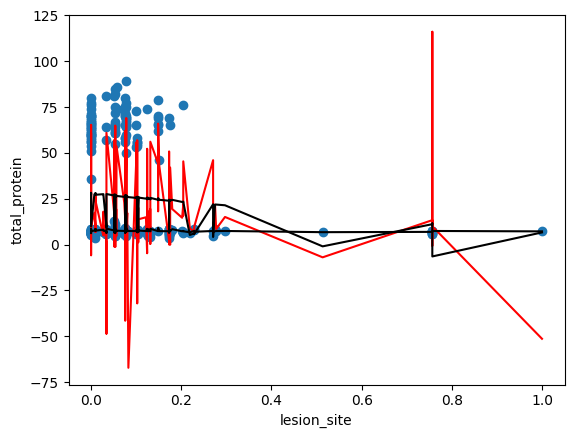

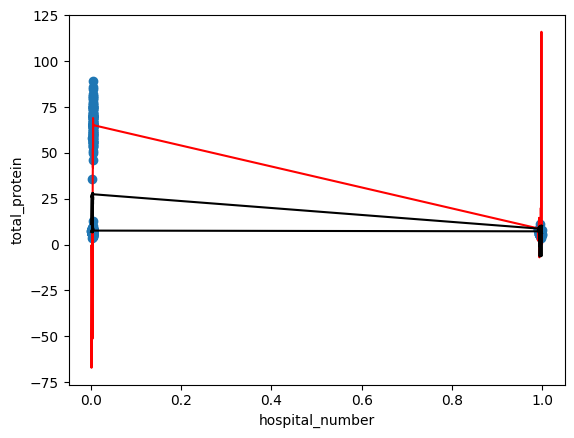

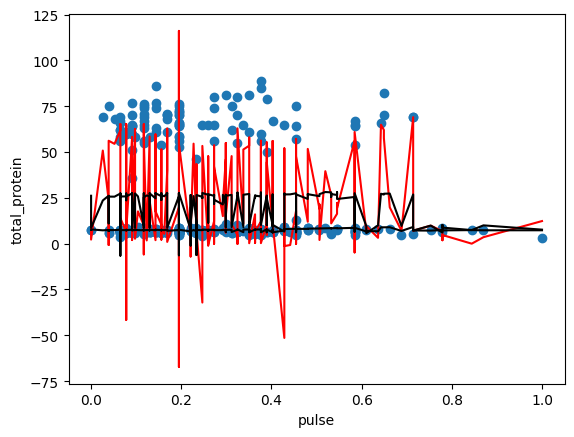

In [22]:
for i in FEATURES:
    ax = plt.axes()
    ax.scatter(X[i], y)
    ax.set_xlabel(i)
    ax.set_ylabel('total_protein')
    sorted_x = X.sort_values(i)
    for pred in [search_poly_log, search_ridge, search_svr]:
        ax.plot(sorted_x[i], pred.predict(sorted_x), color='red' if pred == best_pred else 'black')
    plt.show()

# 8. кривые обучения

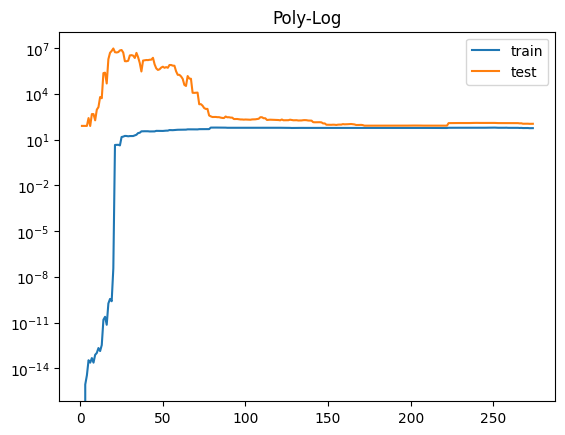

In [23]:
# iterate over train split percentage
from sklearn.metrics import max_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    ax = plt.subplot()
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(max_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(max_error(y_test, y_test_predict))
        
    ax.set_yscale('log')
    ax.plot([i for i in range(1, len(X_train)+1)], train_score, label="train")
    ax.plot([i for i in range(1, len(X_train)+1)], test_score, label="test")
    ax.legend()
    # plt.axis([0, len(X_train)+1, 0, 4]) # np.sqrt(test_score).max()
plt.title("Poly-Log")
plot_learning_curve(search_poly_log.best_estimator_, X_train, X_test, y_train, y_test)

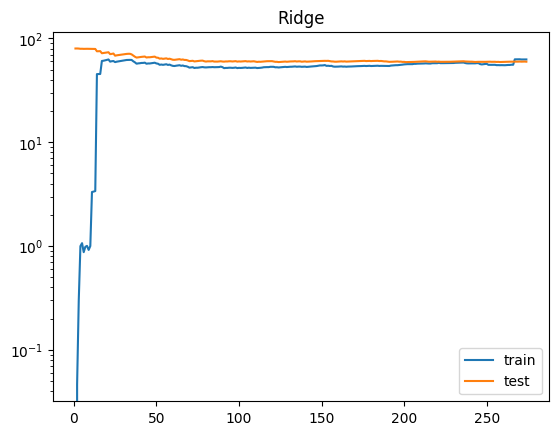

In [24]:
plt.title("Ridge")
plot_learning_curve(search_ridge.best_estimator_, X_train, X_test, y_train, y_test)

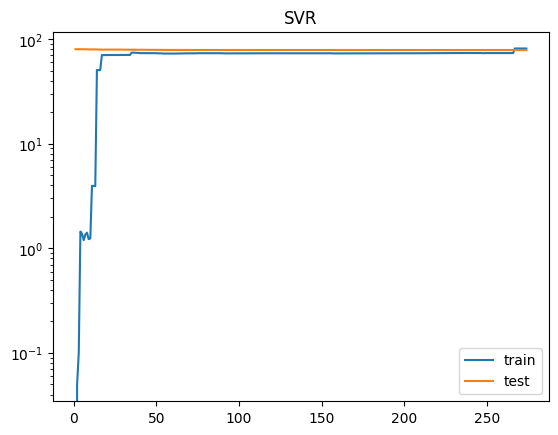

In [25]:
plt.title("SVR")
plot_learning_curve(search_svr.best_estimator_, X_train, X_test, y_train, y_test)